Лабораторная работа 1. Линейная регрессия и факторный анализ

Цель работы: изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качества.

Описание датасета California Housing Prices: этот датасет содержит информацию о домах, расположенных в определённом округе Калифорнии, а также сводную статистику по ним, основанную на данных переписи 1990 года. Основная цель - предсказание средней стоимости дома в различных кварталах Калифорнии.

Столбцы в датасете: <br>
longitude - Долгота (географическая координата) <br>
latitude - Широта (географическая координата) <br>
housing_median_age - Средний возраст дома в квартале; чем меньше число, тем новее здание <br>
total_rooms - Общее количество комнат в квартале <br>
total_bedrooms - Общее количество спален в квартале <br>
population - Общее количество людей, проживающих в квартале <br>
households - Количество домохозяйств в квартале, то есть групп людей, проживающих в одном жилом помещении, в квартале <br>
median_income - Средний доход домохозяйств в квартале (измеряется в десятках тысяч долларов США) <br>
ocean_proximity - Расположение дома относительно океана/моря <br><br>
median_house_value - Средняя стоимость жилья для домохозяйств в пределах квартала (в долларах США) - целевая переменная. <br>

<br>
1. Загрузка датасета California Housing Prices; первичный анализ.
<br>
Сразу удаляем переменные longitude и latitud, потому что это геоданные.

In [1]:
import kagglehub
import pandas as pd
import os
import numpy as np
from scipy.stats import skew, kurtosis

path = kagglehub.dataset_download("camnugent/california-housing-prices")
file_path = os.path.join(path, "housing.csv")
df = pd.read_csv(file_path, sep=',')

columns_to_drop = ['longitude', 'latitude' ]
df = df.drop(columns=columns_to_drop)

print(f"Размер: {df.shape}")

print(df.describe())

c:\Документы\НГТУ\7 семестр\ИИ и машинное обучение\лабы\лаба 1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Размер: (20640, 8)
       housing_median_age   total_rooms  total_bedrooms    population  \
count        20640.000000  20640.000000    20433.000000  20640.000000   
mean            28.639486   2635.763081      537.870553   1425.476744   
std             12.585558   2181.615252      421.385070   1132.462122   
min              1.000000      2.000000        1.000000      3.000000   
25%             18.000000   1447.750000      296.000000    787.000000   
50%             29.000000   2127.000000      435.000000   1166.000000   
75%             37.000000   3148.000000      647.000000   1725.000000   
max             52.000000  39320.000000     6445.000000  35682.000000   

         households  median_income  median_house_value  
count  20640.000000   20640.000000        20640.000000  
mean     499.539680       3.870671       206855.816909  
std      382.329753       1.899822       115395.615874  
min        1.000000       0.499900        14999.000000  
25%      280.000000       2.563400    

In [2]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

print("\nАсимметрия:")
for col in numeric_columns:
    skew_val = skew(df[col].dropna())
    print(f"{col:20s}: {skew_val:8.3f}")

print("\nЭксцесс:")
for col in numeric_columns:
    kurt_val = kurtosis(df[col].dropna())
    print(f"{col:20s}: {kurt_val:8.3f}")


Асимметрия:
housing_median_age  :    0.060
total_rooms         :    4.147
total_bedrooms      :    3.459
population          :    4.935
households          :    3.410
median_income       :    1.647
median_house_value  :    0.978

Эксцесс:
housing_median_age  :   -0.801
total_rooms         :   32.623
total_bedrooms      :   21.980
population          :   73.535
households          :   22.052
median_income       :    4.951
median_house_value  :    0.328


2. Визуализация распределения признаков

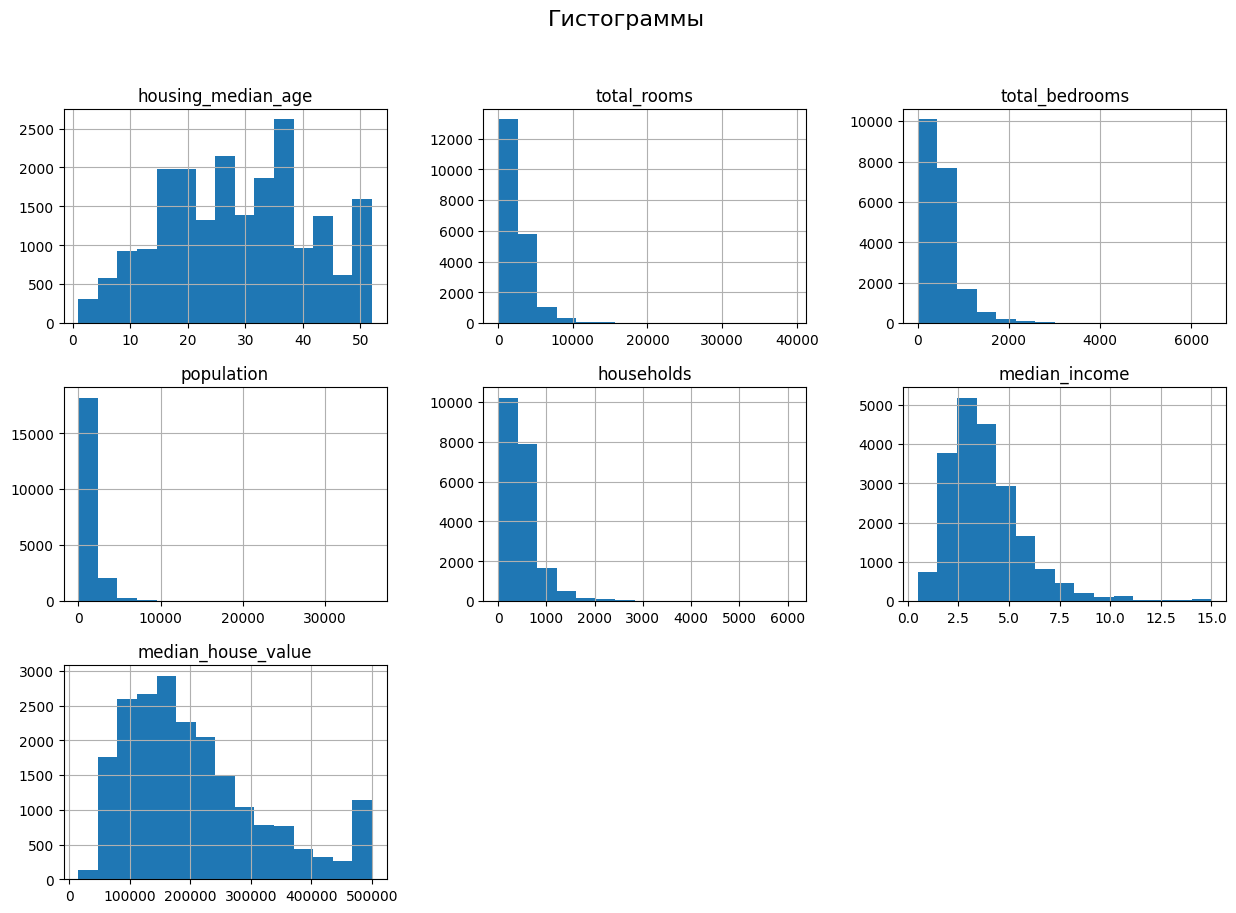

In [3]:
import matplotlib.pyplot as plt
import math

count_intervals = int(1 + math.log2(df.shape[0]))

df.hist(bins=count_intervals, figsize=(15, 10))
plt.suptitle("Гистограммы", fontsize=16)
plt.show()


Анализ распределений<br><br>
2.1 housing_median_age<br>
Ассиметрия: 0.060 - почти нулевая ассиметрия<br>
Эксцесс: -0.801 - плосковершинное распределение<br>
Среднее: 28.64, Медиана: 29.0 - почти совпадают<br>
Итог: распределение близко к нормальному, но не является им.<br><br>
2.2 total_rooms<br>
Ассиметрия: 4.147 - сильно правосторонняя ассиметрия<br>
Эксцесс: 32.623 - островершинное распределение<br>
Среднее: 2635.76, Медиана: 2127 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.3 total_bedrooms<br>
Ассиметрия: 3.459 - сильная правосторонняя ассиметрия<br>
Эксцесс: 21.980 - островершинное распределение<br>
Среднее: 537.87, Медиана: 435 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.4 population<br>
Ассиметрия: 4.935 - очень сильная правосторонняя ассиметрия<br>
Эксцесс: 73.535 - островершинное распределение<br>
Среднее: 1425.48, Медиана: 1166 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.5 households<br>
Ассиметрия: 3.410 - сильная правосторонняя ассиметрия<br>
Эксцесс: 22.052 - островершинное распределение<br>
Среднее: 499.54, Медиана: 409 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.6 median_income<br>
Ассиметрия: 1.647 - умеренная правосторонняя ассиметрия<br>
Эксцесс: 4.951 - островершинное распределение<br>
Среднее: 3.87, Медиана: 3.53 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.7 median_house_value<br>
Ассиметрия: 0.978 - умеренная правосторонняя ассиметрия<br>
Эксцесс: 0.328 - распределение близко к нормальному<br>
Среднее: 206855.82, Медиана: 179700 - среднее > медиана<br>
Итог: распределение близко к нормальному, но не является им.<br>

3. Удаление пропущенных значений

In [4]:
import pandas as pd

df_cleaned = df.replace('?', pd.NA).dropna()

print(f"Исходный размер: {df.shape}")
print(f"Размер после удаления пропущенных значений: {df_cleaned.shape}")

Исходный размер: (20640, 8)
Размер после удаления пропущенных значений: (20433, 8)


4. Перевод переменной ocean_proximity в числовую (создание нового столбца ocean_proximity_num и удаление старого ocean_proximity).

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['ocean_proximity_num'] = le.fit_transform(df_cleaned['ocean_proximity'])

print("\n ocean_proximity_num:")
print(sorted(df_cleaned['ocean_proximity_num'].unique()))

columns_to_drop = ['ocean_proximity' ]
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

print("Столбцы после удаления:")
print(df_cleaned.columns.tolist())


 ocean_proximity_num:
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Столбцы после удаления:
['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_num']


5. Построение матрицы корреляций

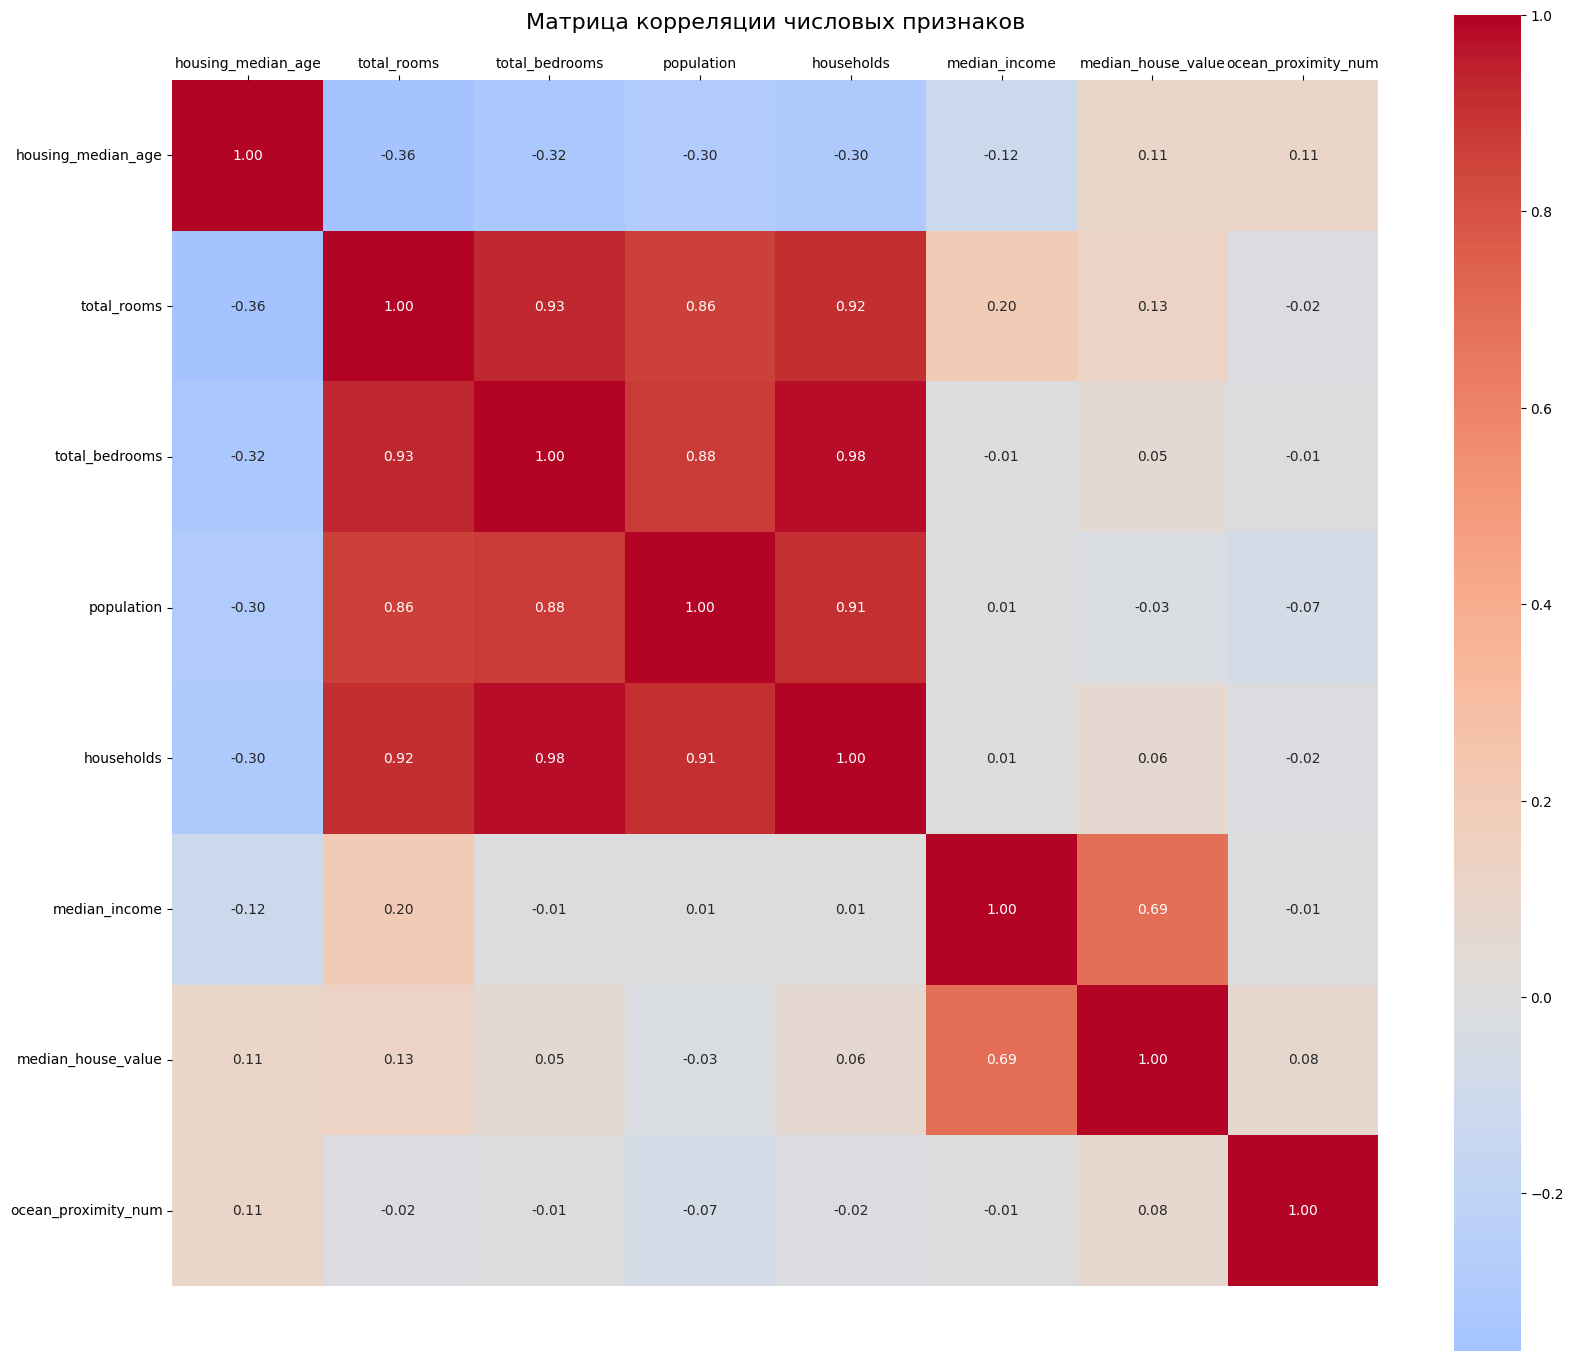


Корреляция с целевой переменной (median_house_value):
median_income: 0.688
total_rooms: 0.133
housing_median_age: 0.106
ocean_proximity_num: 0.080
households: 0.065
total_bedrooms: 0.050
population: -0.025


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(17, 17))

numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numeric_columns].corr()

sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',      
            center=0,             
            square=True,          
            fmt='.2f',            
            cbar_kws={"shrink": .8},
            xticklabels=correlation_matrix.columns,  
            yticklabels=correlation_matrix.columns)  

plt.title('Матрица корреляции числовых признаков', fontsize=16, pad=20)

plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.xaxis.tick_top()       
ax.xaxis.set_label_position('top')  

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nКорреляция с целевой переменной (median_house_value):")
income_corr = correlation_matrix['median_house_value'].sort_values(key=abs, ascending=False)
for feature, corr_value in income_corr.items():
    if feature != 'median_house_value':
        print(f"{feature}: {corr_value:.3f}")

Сильно коррелируемые признаки: <br>
total_bedrooms и households: 0.98 <br>
total_bedrooms и total_rooms: 0.93 <br>
total_rooms и households: 0.92 <br>
households и population: 0.91 <br>
total_bedrooms и population: 0.88 <br>
total_rooms и population: 0.86 <br>
median_income и median_house_value: 0.69 <br>

6. Анализ мультиколлинеарности (VIF-коэффициенты) 
<br>


Для верного подсчёта VIF-коэффициентов применила нормализацию данных. Для нормализации использовался метод стандартизации (StandardScaler), 
который преобразует признаки к нулевому среднему и единичному 
стандартному отклонению. Variance Inflation Factor:
VIF = 1 / (1 – R²), где R² - коэффициент детерминации.
<br>
Формула стандартизации: <br>
z = (x - μ) / σ, где <br>
x - исходное значение <br>
μ - среднее значение признака <br>
σ - стандартное отклонение признака <br>
z - стандартизированное значение

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 


plt.figure(figsize=(12, 10))

print("\n=== Анализ мультиколлинеарности (VIF-коэффициенты) ===")

numeric_data = df_cleaned[numeric_columns]
numeric_data = numeric_data.loc[:, numeric_data.var() > 0]

scaler = StandardScaler()
numeric_data = pd.DataFrame(
    scaler.fit_transform(numeric_data),
    columns=numeric_data.columns
)

vif_data = pd.DataFrame()
vif_data["Признак"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) 
                    for i in range(len(numeric_data.columns))]

vif_data = vif_data.sort_values('VIF', ascending=False)
print(vif_data.to_string(index=False))

high_vif = vif_data[vif_data['VIF'] > 10]

if len(high_vif) > 0:
    print(f"\nВысокая мультиколлинеарность (VIF > 10):")
    for _, row in high_vif.iterrows():
        print(f"  - {row['Признак']}: VIF = {row['VIF']:.2f}")


=== Анализ мультиколлинеарности (VIF-коэффициенты) ===
            Признак       VIF
     total_bedrooms 35.839074
         households 34.241014
        total_rooms 12.282339
         population  6.581608
      median_income  2.956071
 median_house_value  2.323089
 housing_median_age  1.269070
ocean_proximity_num  1.038195

Высокая мультиколлинеарность (VIF > 10):
  - total_bedrooms: VIF = 35.84
  - households: VIF = 34.24
  - total_rooms: VIF = 12.28


<Figure size 1200x1000 with 0 Axes>

Значение VIF выше 10 у трёх переменных: total_bedrooms, households и total_rooms, это свидетельствует о наличии мультиколлинеарности. <br>

7. Построение линейной и гребневой регрессионных моделей. Тренировочная и тестовая выборки разделены в соотношении 80/20. Использовала кросс-валидацию. Для оценки качества построенной модели используются следующие метрики: 
<br>
1)RMSE (Root Mean Square Error) - измеряет среднюю разницу между прогнозируемыми и фактическими значениями в статистической модели. Чем меньше значение RMSE, тем лучше модель предсказывает данные. Чем выше RMSE, тем больше расхождение между прогнозируемыми и фактическими значениями.
<br>
![alt text](image.png)<br>
yi - прогнозируемое значение<br>
y^ - фактическое значение<br>
n - объём выборки<br>
2)R² (коэффициент детерминации) - показывает долю вариации зависимой переменной, объясняемую независимыми переменными в регрессионной модели. Фактически, R² отвечает на вопрос: «Насколько хорошо модель описывает изменения в наблюдаемых данных?». Диапазон значений - от 0 до 1, где <br>
0 — модель не объясняет никакой дисперсии в зависимой переменной; <br>
1 — модель объясняет всю дисперсию зависимой переменной.<br>
![alt text](image-1.png)<br>
3)MAPE (Mean Absolute Percentage Error) - выражает среднее абсолютное отклонение прогнозируемых значений от фактических значений в процентах. Чем ниже значение MAPE, тем точнее прогноз. Более высокое значение MAPE указывает на менее точный прогноз.<br>
![alt text](image-2.png)<br>
yi - прогнозируемое значение<br>
yi^ - фактическое значение<br>
n - объём выборки<br>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


features = ['housing_median_age','total_rooms','total_bedrooms','population','households',
            'median_income','ocean_proximity_num']

X = df_cleaned[features]
y = df_cleaned['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    print(f"=== Метрики ===")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")
    
    return rmse, r2, mape


print("=== Линейная регрессионная модель ===")
lin_reg = LinearRegression()
cv_scores = cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring='r2')
print("=== Кросс-валидация ===")
print(f"CV R² scores: {cv_scores}")
print(f"Средний R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
rmse_lin, r2_lin, mape_lin = calculate_metrics(y_test, y_pred_lin)

print("\n=== Коэффициенты линейной регрессии ===")
print(f"Свободный член (intercept): {lin_reg.intercept_:,.2f}")
print("Коэффициенты при признаках:")
coef_df = pd.DataFrame({
    'Признак': features,
    'Коэффициент': lin_reg.coef_
})
coef_df = coef_df.sort_values('Коэффициент', key=abs, ascending=False)
print(coef_df.to_string(index=False))

=== Линейная регрессионная модель ===
=== Кросс-валидация ===
CV R² scores: [0.59141965 0.53874869 0.58908252 0.54307568 0.56683356]
Средний R²: 0.5658 (+/- 0.0443)
=== Метрики ===
RMSE: 76,208.99
R²: 0.5753
MAPE: 34.39%

=== Коэффициенты линейной регрессии ===
Свободный член (intercept): 206,644.40
Коэффициенты при признаках:
            Признак   Коэффициент
      median_income  90746.678805
     total_bedrooms  44407.328628
        total_rooms -43933.862736
         households  42747.171404
         population -36247.687461
 housing_median_age  22960.678827
ocean_proximity_num   5732.279704


Анализ значений метрик линейной регрессионной модели: <br>
RMSE: 76,208.99 - средняя ошибка предсказания составляет $76,209, это примерно 37% от средней цены, то есть модель часто ошибается на десятки тысяч долларов<br>
R²: 0.5753 - модель объясняет 57.53% вариации цены домов (не очень хорошо объясняет) <br>
MAPE: 34.39% - средняя относительная ошибка 34.39%, то есть модель не очень точна в предсказаниях<br>

In [15]:
print("=== Гребневая регрессионная модель ===")
ridge_reg = Ridge(alpha=1.0)
cv_scores_ridge = cross_val_score(ridge_reg, X_train_scaled, y_train, cv=5, scoring='r2')
print("=== Кросс-валидация ===")
print(f"CV R² scores: {cv_scores_ridge}")
print(f"Средний R²: {cv_scores_ridge.mean():.4f} (+/- {cv_scores_ridge.std() * 2:.4f})")
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
rmse_ridge, r2_ridge, mape_ridge = calculate_metrics(y_test, y_pred_ridge)

=== Гребневая регрессионная модель ===
=== Кросс-валидация ===
CV R² scores: [0.59141184 0.53876219 0.58907548 0.54310852 0.56682137]
Средний R²: 0.5658 (+/- 0.0442)
=== Метрики ===
RMSE: 76,209.45
R²: 0.5753
MAPE: 34.39%


8. Визуализация полученных моделей (линейной и гребневой).

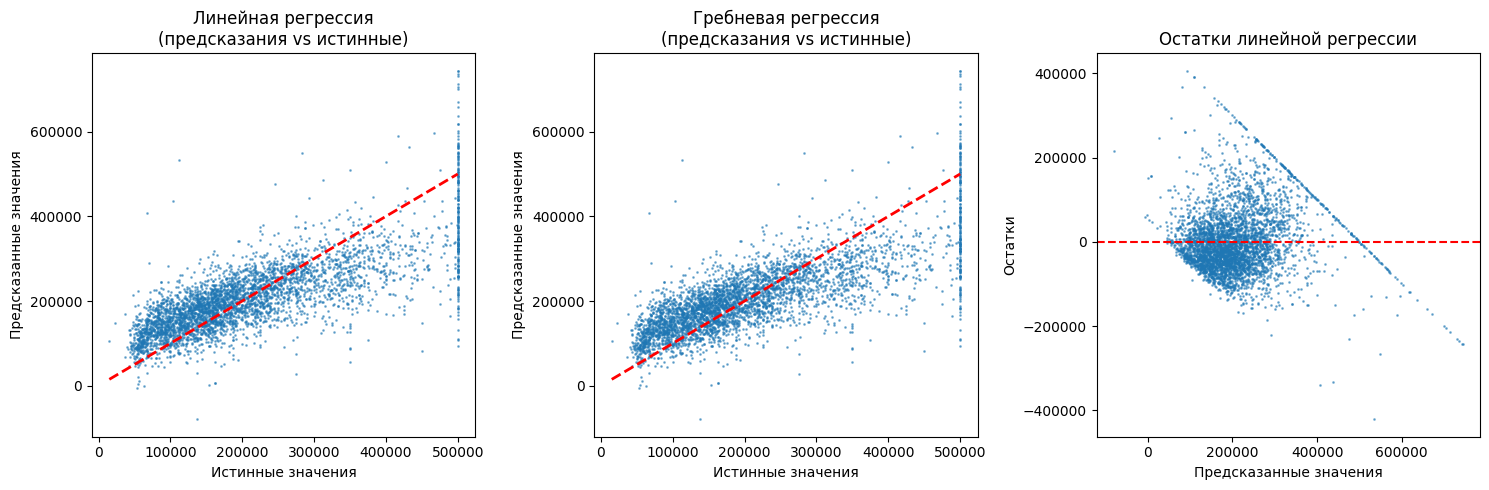

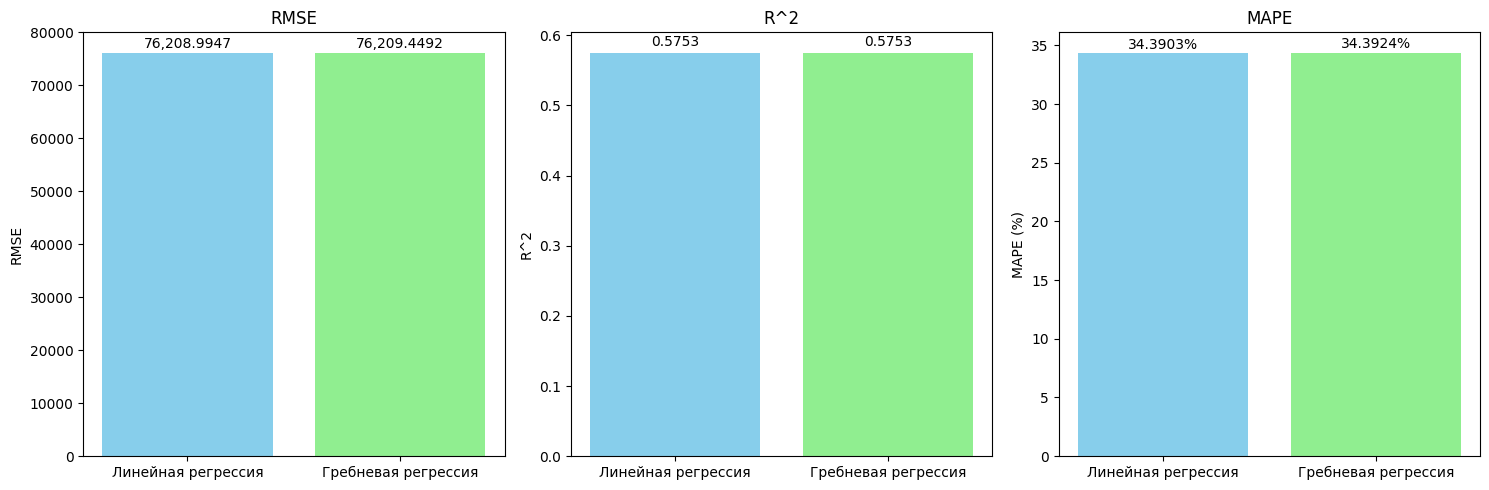

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия\n(предсказания vs истинные)')


plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Гребневая регрессия\n(предсказания vs истинные)')


plt.subplot(1, 3, 3)
residuals = y_test - y_pred_lin
plt.scatter(y_pred_lin, residuals, alpha=0.5, s=1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки линейной регрессии')

plt.tight_layout()
plt.show()

models = ['Линейная регрессия', 'Гребневая регрессия']
rmse_values = [rmse_lin, rmse_ridge]
r2_values = [r2_lin, r2_ridge]
mape_values = [mape_lin, mape_ridge]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].bar(models, rmse_values, color=['skyblue', 'lightgreen'])
axes[0].set_title('RMSE')
axes[0].set_ylabel('RMSE')
for i, v in enumerate(rmse_values):
    axes[0].text(i, v + max(rmse_values)*0.01, f'{v:,.4f}', ha='center')

axes[1].bar(models, r2_values, color=['skyblue', 'lightgreen'])
axes[1].set_title('R^2')
axes[1].set_ylabel('R^2')
for i, v in enumerate(r2_values):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center')

axes[2].bar(models, mape_values, color=['skyblue', 'lightgreen'])
axes[2].set_title('MAPE')
axes[2].set_ylabel('MAPE (%)')
for i, v in enumerate(mape_values):
    axes[2].text(i, v + max(mape_values)*0.01, f'{v:.4f}%', ha='center')

plt.tight_layout()
plt.show()

9. Попробуем снизить размерность признаков с помощью метода главных компонент (PCA).

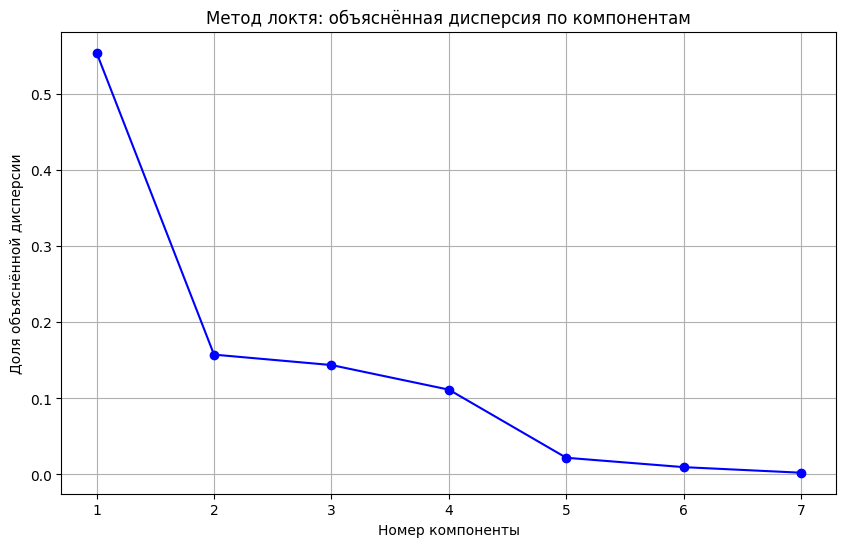

Доля объясненной дисперсии по компонентам:
Компонента 1: 0.5538 (55.38%)
Компонента 2: 0.1574 (15.74%)
Компонента 3: 0.1437 (14.37%)
Компонента 4: 0.1114 (11.14%)
Компонента 5: 0.0219 (2.19%)
Компонента 6: 0.0096 (0.96%)
Компонента 7: 0.0023 (0.23%)

Кумулятивная дисперсия:
Первые 1 компонент(ы): 0.5538 (55.38%)
Первые 2 компонент(ы): 0.7112 (71.12%)
Первые 3 компонент(ы): 0.8548 (85.48%)
Первые 4 компонент(ы): 0.9662 (96.62%)
Первые 5 компонент(ы): 0.9881 (98.81%)
Первые 6 компонент(ы): 0.9977 (99.77%)
Первые 7 компонент(ы): 1.0000 (100.00%)

Оптимальное число компонент для объяснения 95% дисперсии: 4

Размерность до PCA: (16346, 7)
Размерность после PCA: (16346, 4)
Объясненная дисперсия: 0.9662


In [ ]:
from sklearn.decomposition import PCA


pca_full = PCA()
pca_full.fit(X_train_scaled)

explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Номер компоненты')
plt.ylabel('Доля объяснённой дисперсии')
plt.title('Метод локтя: объяснённая дисперсия по компонентам')
plt.grid(True)
plt.show()

print("Доля объясненной дисперсии по компонентам:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"Компонента {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nКумулятивная дисперсия:")
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
for i, cum_var in enumerate(cumsum_var):
    print(f"Первые {i+1} компонент(ы): {cum_var:.4f} ({cum_var*100:.2f}%)")

n_components = np.argmax(cumsum_var >= 0.95) + 1
print(f"\nОптимальное число компонент для объяснения 95% дисперсии: {n_components}")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nРазмерность до PCA: {X_train_scaled.shape}")
print(f"Размерность после PCA: {X_train_pca.shape}")
print(f"Объясненная дисперсия: {sum(pca.explained_variance_ratio_):.4f}")

Первые 4 компоненты объясняют 96.62% всей информации, а остальные — только 3.38%. Также по графику видно, что происходит резкое падение дисперсии после 1-ой компоненты ( у 1 -ой компоненты доля объясненной дисперсии 55.38%, а у 2-ой в разы меньше - 15.74%), затем более пологий спад до 4-й, а потом — почти горизонтальная линия. Локоть находится примерно на 4-й компоненте — именно там добавление новых компонент перестаёт давать значительный прирост объяснённой дисперсии. Это говорит о том, что добавление 5-й, 6-й, 7-й компонент не даёт существенного прироста информации. <br>Значит, можно уменьшить размерность с 7 до 4 признаков, сохранив практически всю информацию и при этом устранив мультиколлинеарность.

10. Построение линейной и гребневой регрессионных моделей на 4 компонентах. 

In [16]:
print("\n=== Линейная регрессионная модель (на главных компонентах) ===")
lin_reg_pca = LinearRegression()

cv_scores_pca = cross_val_score(lin_reg_pca, X_train_pca, y_train, cv=5, scoring='r2')
print("=== Кросс-валидация ===")
print(f"CV R² scores: {cv_scores_pca}")
print(f"Средний R²: {cv_scores_pca.mean():.4f} (+/- {cv_scores_pca.std() * 2:.4f})")

lin_reg_pca.fit(X_train_pca, y_train)
y_pred_lin_pca = lin_reg_pca.predict(X_test_pca)

rmse_lin_pca, r2_lin_pca, mape_lin_pca = calculate_metrics(y_test, y_pred_lin_pca)

print("\n=== Коэффициенты линейной регрессии ===")
print(f"Свободный член (intercept): {lin_reg_pca.intercept_:,.2f}")
print("Коэффициенты при признаках:")
coef_df_pca = pd.DataFrame({
    'Признак': [f'PC{i+1}' for i in range(X_train_pca.shape[1])],
    'Коэффициент': lin_reg_pca.coef_
})
coef_df_pca = coef_df_pca.sort_values('Коэффициент', key=abs, ascending=False)
print(coef_df_pca.to_string(index=False))


print("\n=== Гребневая регрессионная модель (на главных компонентах) ===")
ridge_reg_pca = Ridge(alpha=1.0)

cv_scores_ridge_pca = cross_val_score(ridge_reg_pca, X_train_pca, y_train, cv=5, scoring='r2')
print("=== Кросс-валидация ===")
print(f"CV R² scores: {cv_scores_ridge_pca}")
print(f"Средний R²: {cv_scores_ridge_pca.mean():.4f} (+/- {cv_scores_ridge_pca.std() * 2:.4f})")

ridge_reg_pca.fit(X_train_pca, y_train)
y_pred_ridge_pca = ridge_reg_pca.predict(X_test_pca)

rmse_ridge_pca, r2_ridge_pca, mape_ridge_pca = calculate_metrics(y_test, y_pred_ridge_pca)


=== Линейная регрессионная модель (на главных компонентах) ===
=== Кросс-валидация ===
CV R² scores: [0.53309022 0.4866281  0.53693661 0.51148568 0.50877278]
Средний R²: 0.5154 (+/- 0.0365)
=== Метрики ===
RMSE: 81,130.72
R²: 0.5187
MAPE: 37.40%

=== Коэффициенты линейной регрессии ===
Свободный член (intercept): 206,644.40
Коэффициенты при признаках:
Признак  Коэффициент
    PC3 57725.362985
    PC4 47057.775650
    PC2 39300.318060
    PC1  3578.951735

=== Гребневая регрессионная модель (на главных компонентах) ===
=== Кросс-валидация ===
CV R² scores: [0.53309037 0.48662951 0.53693584 0.51148622 0.50877152]
Средний R²: 0.5154 (+/- 0.0365)
=== Метрики ===
RMSE: 81,130.80
R²: 0.5187
MAPE: 37.40%


В результате обучения линейной регрессии на главных компонентах наибольший вклад в предсказание целевой переменной вносят компоненты PC3 и PC4, несмотря на то, что PC1 объясняет наибольшую часть дисперсии (55.38%). Это говорит о том, что метод главных компонент PCA ищет направления с наибольшей вариативностью, а не с наибольшей корреляцией с целевой переменной. 

11. Сравнение построенных моделей (до PCA и после PCA).

                        Модель         RMSE       R²  MAPE (%)             Признаки
 Линейная регрессия (исходные) 76208.994699 0.575303 34.390292           7 исходных
Гребневая регрессия (исходные) 76209.449198 0.575298 34.392414           7 исходных
      Линейная регрессия (PCA) 81130.720959 0.518676 37.398446 4 главные компоненты
     Гребневая регрессия (PCA) 81130.795780 0.518675 37.399244 4 главные компоненты


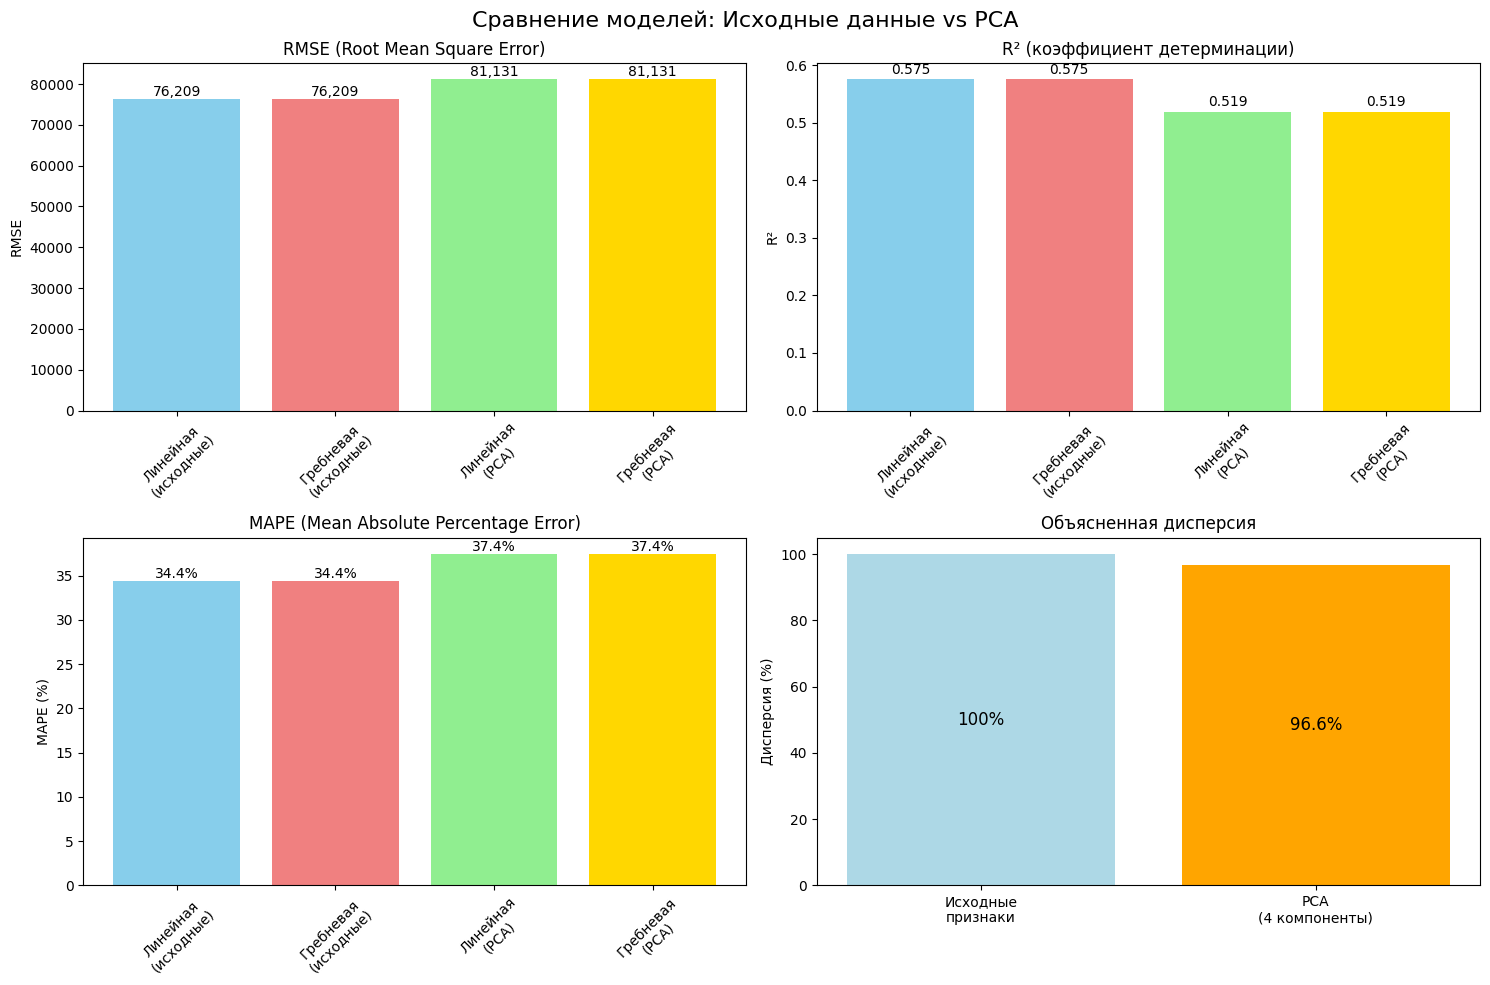


Лучшая модель по R²: Линейная регрессия (исходные) (R² = 0.5753)


In [13]:
comparison_data = {
    'Модель': [
        'Линейная регрессия (исходные)',
        'Гребневая регрессия (исходные)',
        'Линейная регрессия (PCA)',
        'Гребневая регрессия (PCA)'
    ],
    'RMSE': [
        rmse_lin,
        rmse_ridge,
        rmse_lin_pca,
        rmse_ridge_pca
    ],
    'R²': [
        r2_lin,
        r2_ridge,
        r2_lin_pca,
        r2_ridge_pca
    ],
    'MAPE (%)': [
        mape_lin,
        mape_ridge,
        mape_lin_pca,
        mape_ridge_pca
    ],
    'Признаки': [
        '7 исходных',
        '7 исходных',
        '4 главные компоненты',
        '4 главные компоненты'
    ]
}

results_df = pd.DataFrame(comparison_data)

results_df = results_df.sort_values('R²', ascending=False).reset_index(drop=True)

print(results_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Сравнение моделей: Исходные данные vs PCA', fontsize=16)

models_short = ['Линейная\n(исходные)', 'Гребневая\n(исходные)', 'Линейная\n(PCA)', 'Гребневая\n(PCA)']

axes[0,0].bar(models_short, results_df['RMSE'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[0,0].set_title('RMSE (Root Mean Square Error)')
axes[0,0].set_ylabel('RMSE')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['RMSE']):
    axes[0,0].text(i, v + max(results_df['RMSE'])*0.01, f'{v:,.0f}', ha='center')

axes[0,1].bar(models_short, results_df['R²'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[0,1].set_title('R² (коэффициент детерминации)')
axes[0,1].set_ylabel('R²')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['R²']):
    axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center')

axes[1,0].bar(models_short, results_df['MAPE (%)'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1,0].set_title('MAPE (Mean Absolute Percentage Error)')
axes[1,0].set_ylabel('MAPE (%)')
axes[1,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['MAPE (%)']):
    axes[1,0].text(i, v + max(results_df['MAPE (%)'])*0.01, f'{v:.1f}%', ha='center')

axes[1,1].bar(['Исходные\nпризнаки', 'PCA\n(4 компоненты)'], 
              [100, sum(pca.explained_variance_ratio_)*100], 
              color=['lightblue', 'orange'])
axes[1,1].set_title('Объясненная дисперсия')
axes[1,1].set_ylabel('Дисперсия (%)')
axes[1,1].text(0, 50, '100%', ha='center', va='center', fontsize=12)
axes[1,1].text(1, sum(pca.explained_variance_ratio_)*50, 
               f'{sum(pca.explained_variance_ratio_)*100:.1f}%', 
               ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

best_model_r2 = results_df.loc[0, 'Модель']
best_r2_value = results_df.loc[0, 'R²']
print(f"\nЛучшая модель по R²: {best_model_r2} (R² = {best_r2_value:.4f})")


12. Проверка устранения мультиколлинеарности.

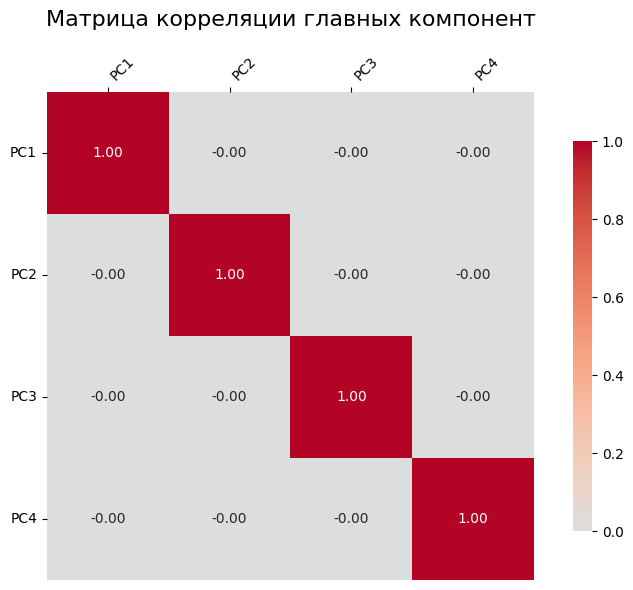

In [14]:
pca_corr_matrix = np.corrcoef(X_train_pca.T)
pca_corr_df = pd.DataFrame(
    pca_corr_matrix,
    columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])],
    index=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]
)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(pca_corr_df, 
                 annot=True,           
                 cmap='coolwarm',      
                 center=0,             
                 square=True,          
                 fmt='.2f',            
                 cbar_kws={"shrink": .8})

plt.title('Матрица корреляции главных компонент', fontsize=16, pad=20)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


Максимальная корреляция между компонентами очень мала (близка к нулю). Значит, мультиколлинеарность успешно устранена.

13. Анализ эффективности метода главных компонент (PCA): <br>
Линейная регрессия: R² изменился с 0.5753 на 0.5187. <br>
Гребневая регрессия: R² изменился с 0.5753 на 0.5187. <br>

В результате лабораторной работы были построены линейная и гребневая регрессионные модели на предварительно подготовленных данных. Была выявлена мультиколлинеарность, для её устранения был использован метод главных компонент (PCA). В результате было получено, что модели, построенные на исходных признаках, 
демонстрируют несколько лучшее качество, чем модели на главных компонентах. Это связано с потерей 3.38% информации при применении PCA. Анализ коэффициентов корреляции между исходными признаками подтвердил наличие линейных зависимостей (шесть коэффициентов корреляции были больше 0.8), что обосновывает применение PCA. Полученные главные компоненты позволили сохранить основную долю дисперсии данных (96.62%). Снижение размерности с 7 до 4 признаков упростило модель, была устранена мультиколлинеарность. Кроме того, сокращение числа признаков привело к снижению вычислительной сложности и времени обучения моделей, что особенно важно при работе с большими объемами данных. 